In [30]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [31]:
data = pd.read_csv(r'C:\Users\a_del\OneDrive\Desktop\learningSet.csv')

In [32]:
#Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.

In [33]:
#Check for null values in the numerical columns.

In [34]:
numerical = data.select_dtypes(np.number)

In [35]:
numerical

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,NaN,3.0,1.0,2,0.0,0.0,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,NaN,1.0,4.0,2,0.0,0.0,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,1.0,3.0,2.0,60,1.0,0.0,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,...,9602,NaN,NaN,25.000000,184568,0,0.0,0,1,12.0
95408,9601,1,5001,48.0,1.0,7.0,9.0,1,0.0,0.0,...,9603,NaN,NaN,20.000000,122706,0,0.0,1,1,2.0
95409,9501,1,3801,60.0,NaN,NaN,NaN,0,NaN,NaN,...,9410,9501.0,3.0,8.285714,189641,0,0.0,1,3,34.0
95410,8601,0,4005,58.0,NaN,7.0,NaN,0,NaN,NaN,...,8612,8704.0,4.0,12.146341,4693,1,18.0,1,4,11.0


In [36]:
nulls_percent_data = pd.DataFrame(numerical.isna().sum()/len(numerical)).reset_index()
nulls_percent_data.columns = ['column_name', 'nulls_percentage']
nulls_percent_data

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,TCODE,0.000000
2,DOB,0.000000
3,AGE,0.248030
4,NUMCHLD,0.870184
...,...,...
402,TARGET_B,0.000000
403,TARGET_D,0.000000
404,HPHONE_D,0.000000
405,RFA_2F,0.000000


In [37]:
nulls_percent_data[nulls_percent_data['nulls_percentage'] > 0]

,column_name,nulls_percentage
3,AGE,0.248030
4,NUMCHLD,0.870184
5,INCOME,0.223096
6,WEALTH1,0.468830
8,MBCRAFT,0.553955
...,...,...
386,RAMNT_23,0.917631
387,RAMNT_24,0.814090
398,NEXTDATE,0.104526
399,TIMELAG,0.104526


In [38]:
#since we are interested only in the following columns: GEOCODE2, WEALTH1, ADI, DMA,and MSA

In [39]:
nulls_percent_data[(nulls_percent_data.column_name.isin(["GEOCODE2","WEALTH1","ADI", "DMA", "MSA"]))]

,column_name,nulls_percentage
6,WEALTH1,0.468830
150,MSA,0.001383
151,ADI,0.001383
152,DMA,0.001383


In [40]:
#Starting the cleaning of column GEOCODE2

In [41]:
data['GEOCODE2'].value_counts(dropna=False)

A      34484
B      28505
D      16580
C      15524
         187
NaN      132
Name: GEOCODE2, dtype: int64

In [42]:
data['GEOCODE2'].fillna('Unknown', inplace=True) #assigned 'Uknown' to empty speaces for better use


In [43]:
data['GEOCODE2'].unique()

array(['C', 'A', 'D', 'B', ' ', 'Unknown'], dtype=object)

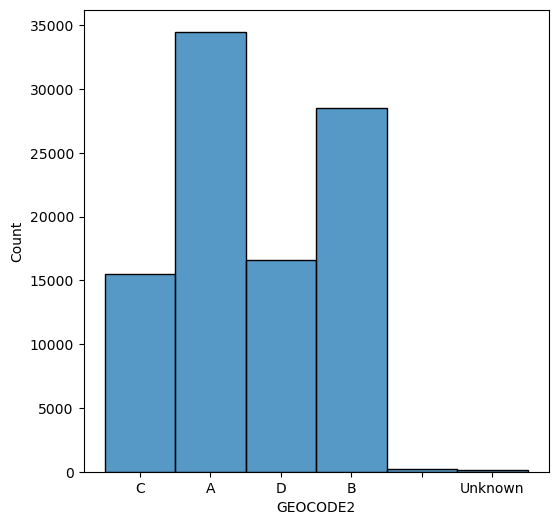

In [56]:
fig, ax = plt.subplots(1,figsize=(6,6))
sns.histplot(data['GEOCODE2'])
plt.show()

In [44]:
#Starting the cleaning of column WEALTH1

In [46]:
data['WEALTH1'].isna().sum()#large number of NaNs, will try replacing with the mean for now 

44732

In [48]:
data['WEALTH1'] = data['WEALTH1'].fillna(data['WEALTH1'].mean())

In [49]:
print(data['WEALTH1'].unique())

[5.3456985 9.        1.        4.        2.        6.        0.
 5.        8.        3.        7.       ]


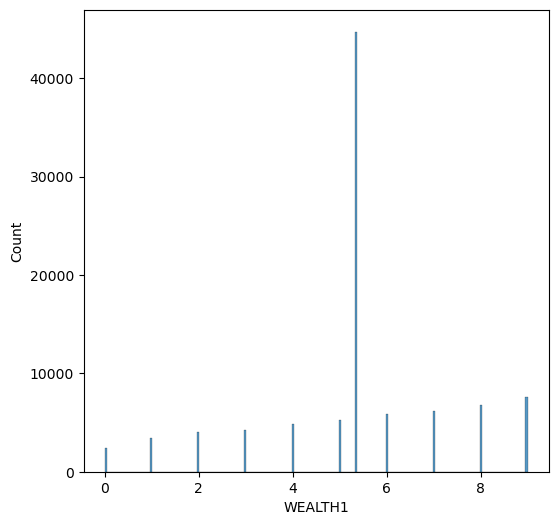

In [57]:
fig, ax = plt.subplots(1,figsize=(6,6))
sns.histplot(data['WEALTH1'])
plt.show()

In [ ]:
#Starting the cleaning of column ADI

In [50]:
data['ADI'].value_counts()

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 204, dtype: int64

In [51]:
data['ADI'].isna().sum()

132

In [ ]:
#we have only 132 NaNs so we can try dropping them for now 

In [52]:
data1 = data.dropna(subset = ['ADI'])

In [53]:
data1['ADI'].isna().sum()

0

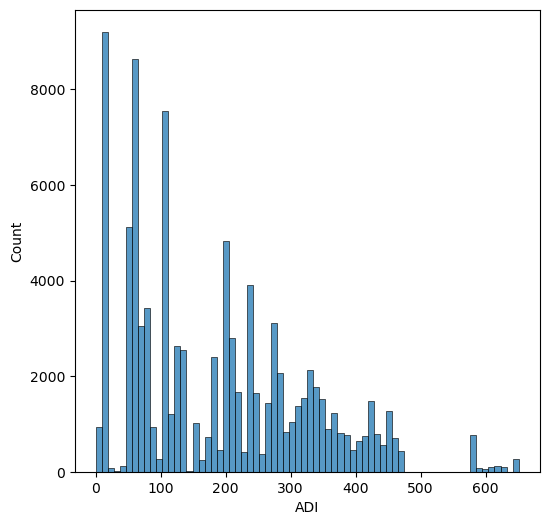

In [59]:
fig, ax = plt.subplots(1,figsize=(6,6))
sns.histplot(data1['ADI'])
plt.show()

In [ ]:
#Need to explore more the values above 550 to check if they are relevant 

In [60]:
data1['ADI'].describe()

count    95280.000000
mean       187.356402
std        137.019184
min          0.000000
25%         65.000000
50%        175.000000
75%        279.000000
max        651.000000
Name: ADI, dtype: float64

In [75]:
#Calculate the mean
mean = data1['ADI'].mean()

#Calculate the Standard deviation
std =data1['ADI'].std()

# Calculate z-scores and asign them to a new column
data1["Z-score"] = (data1['ADI']-mean)/std

# Find observations with a z-score greater than 3 or less than -3
data1[(data1["Z-score"]>3) | (data1["Z-score"]<-3)]

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2,Z-score
66,9201,L01,1,FL,34231,,,1805,0,X,...,1,L,2,G,X,X,X,13.0,B,3.339997
98,8801,DNA,0,FL,34239,,,809,0,X,...,1,L,1,E,X,X,X,13.0,B,3.339997
192,9401,SYC,0,MT,59643,,,0,0,,...,0,L,4,E,X,X,X,57.0,D,3.106453
271,8601,FOR,4,MI,49707,,,4912,0,,...,1,L,1,F,X,X,X,39.0,D,3.208628
483,9101,GLP,0,AZ,86045,,,5001,0,,...,0,L,4,D,X,X,X,62.0,C,3.194032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94236,8601,SUN,2,MT,59711,,,0,0,,...,0,L,1,E,X,X,X,42.0,D,3.106453
94420,9101,MCC,2,FL,32607,,,1103,0,,...,1,L,3,E,X,X,X,36.0,C,3.164839
94757,9201,BML,0,FL,32655,,,4401,0,,...,0,L,1,F,X,X,X,58.0,C,3.164839
95218,9601,MBC,4,MT,59714,,,5301,0,,...,1,L,1,F,X,X,X,56.0,D,3.106453


In [73]:
#  Calculate the first and third quartiles (Q1 and Q3) using the quantile method
q1 = data1['ADI'].quantile(q=0.25)
q3 = data1['ADI'].quantile(q=0.75)

# Calculate iqr (iqr = q3 - q1)
iqr = q3 - q1

#  Calculate the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers in column 'ADI'
outliers = data1[(data1['ADI'] < lower_bound) | (data1['ADI'] > upper_bound)]

# Print the outliers
print("Outliers in column 'ADI':")
outliers.sort_values(by='ADI')


Outliers in column 'ADI':


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
65818,8701,LIS,2,MD,21740-,,,508,0,X,...,10.0,0,L,2,F,X,X,X,11.0,C
64308,9101,ENQ,0,AL,36203,,,0,0,,...,0.0,1,L,2,F,X,X,X,37.0,C
28800,9401,NWN,2,AL,36272,,,3501,0,,...,4.0,0,L,4,D,X,X,X,60.0,C
11091,9101,PBL,0,AL,36207,,,0,0,,...,0.0,1,L,1,E,X,X,X,37.0,C
89201,9501,STV,0,AL,36250-,,,0,0,,...,0.0,0,L,3,F,X,X,X,44.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40190,9101,L01,1,FL,34293,,,1801,0,,...,35.0,1,L,1,F,X,X,X,13.0,B
39017,8601,IMP,0,FL,34223,,,0,0,,...,0.0,1,L,2,E,X,X,X,13.0,B
38712,8601,FRC,2,FL,34284,,,1505,0,X,...,0.0,0,L,1,G,X,X,X,13.0,B
41758,8601,STR,0,FL,34287,,,0,0,,...,0.0,0,L,2,E,X,X,X,55.0,B


In [62]:
# We can see that the max deviates a lot from the mean which is affected by th e presence of outliers.We do not have enough info for column 'ADI' tounderstand the significance or not of these outliers or if they are due to incorrect collection of the data. We can try to cap the outliers with minimum and uper limit calculation.

In [78]:
data_capped =data1.copy()

data_capped['ADI'] = np.where(data_capped['ADI'] > upper_bound, upper_bound,
                              np.where(data_capped['ADI'] < lower_bound, lower_bound, data_capped['ADI']))


In [ ]:
#Starting the cleaning of column DMA

In [79]:
data1['DMA'].isna().sum()

0

In [80]:
data1['DMA'].value_counts()

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 206, dtype: int64

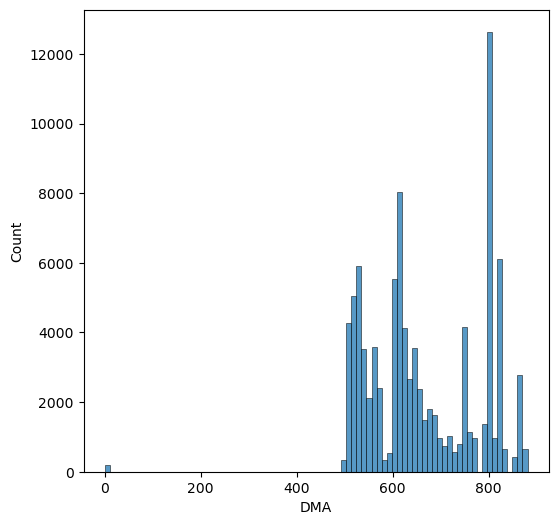

In [84]:
fig, ax = plt.subplots(1,figsize=(6,6))
sns.histplot(data1['DMA'])
plt.show()

In [ ]:
#Starting the cleaning of column MSA

In [82]:
data1['MSA'].isna().sum()

0

In [83]:
data1['MSA'].value_counts()

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 298, dtype: int64

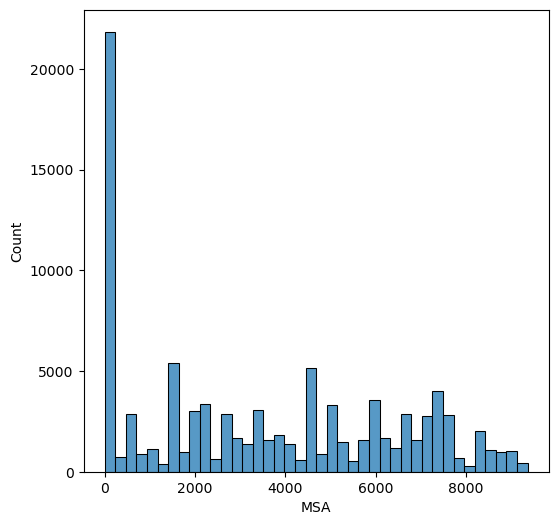

In [85]:
fig, ax = plt.subplots(1,figsize=(6,6))
sns.histplot(data1['MSA'])
plt.show()